In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("random_dataset.xlsx")

In [5]:
data_masked = data.mask((data >= 10) & (data <= 60))

In [6]:
print("Count of NAs in each row:\n", data_masked.isna().sum(axis=1))
print("\nCount of NAs in each column:\n", data_masked.isna().sum())

Count of NAs in each row:
 0      8
1     10
2      7
3      5
4      9
      ..
95     9
96     7
97     8
98     5
99     7
Length: 100, dtype: int64

Count of NAs in each column:
 col_1     25
col_2     18
col_3     27
col_4     24
col_5     28
col_6     31
col_7     22
col_8     26
col_9     24
col_10    30
col_11    29
col_12    25
col_13    18
col_14    26
col_15    30
col_16    21
col_17    28
col_18    25
col_19    26
col_20    18
col_21    23
col_22    25
col_23    23
col_24    20
col_25    21
col_26    26
col_27    25
col_28    27
col_29    24
col_30    27
dtype: int64


In [7]:
data_filled = data_masked.apply(lambda col: col.fillna(col.mean()), axis=0)

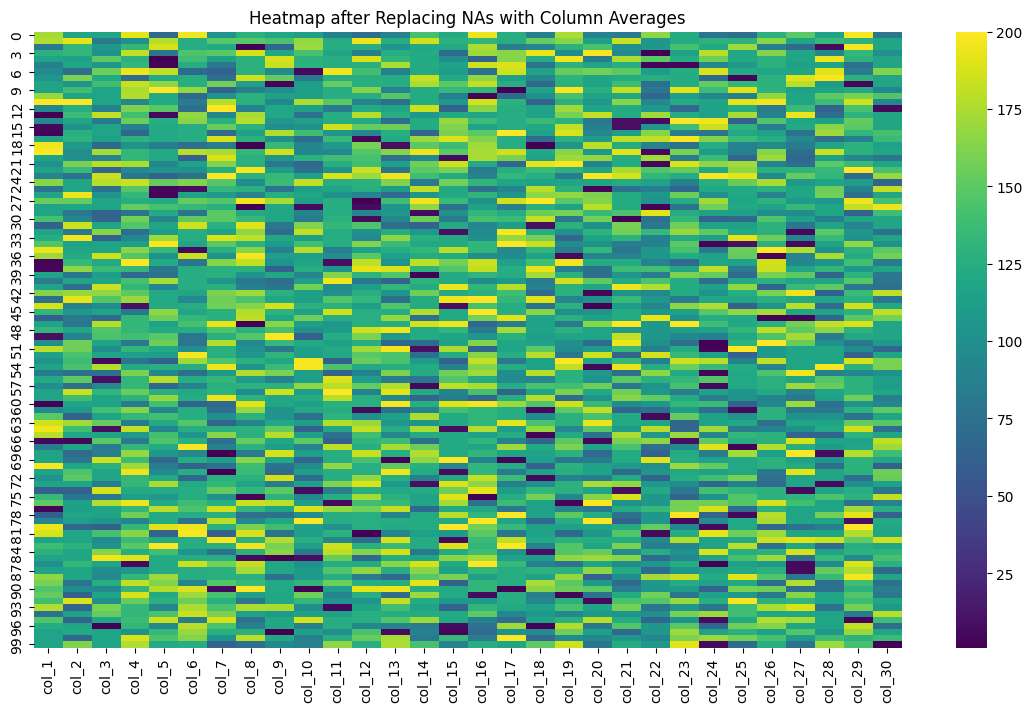

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(data_filled, cmap="viridis", cbar=True)
plt.title("Heatmap after Replacing NAs with Column Averages")
plt.show()


In [9]:
corr_matrix = data_filled.corr()
# Count how many pairs have correlation <= 0.7 (excluding diagonal)
num_low_corr_cols = (corr_matrix <= 0.7).sum().sum() - len(corr_matrix)
print(f"\nNumber of correlation entries <= 0.7 (excluding diagonal): {num_low_corr_cols}")



Number of correlation entries <= 0.7 (excluding diagonal): 840


In [10]:
avg_corr = corr_matrix.mean()
num_cols_low_corr = (avg_corr <= 0.7).sum()
print(f"Number of columns with average correlation <= 0.7: {num_cols_low_corr}")

Number of columns with average correlation <= 0.7: 30


In [12]:
df_norm = (data_filled - data_filled.min()) / (data_filled.max() - data_filled.min()) * 10
print("\nData normalized between 0 and 10.")
print(df_norm.head())


Data normalized between 0 and 10.
      col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0  8.686869  5.845570  5.979381  9.639175  3.366834  9.895833  5.175879   
1  8.838384  9.642857  4.175258  4.845361  8.894472  6.177536  7.386935   
2  3.989899  6.581633  5.360825  6.538931  9.346734  6.177536  6.030151   
3  6.414141  6.530612  5.103093  9.020619  3.919598  7.187500  7.437186   
4  5.825589  5.561224  7.628866  6.288660  0.000000  6.927083  5.728643   

      col_8     col_9    col_10  ...    col_21    col_22    col_23    col_24  \
0  6.428474  5.957419  5.585137  ...  4.070352  8.593750  6.092632  3.908629   
1  7.424242  7.135678  8.383838  ...  9.195980  5.481250  6.092632  6.497462   
2  0.050505  3.266332  8.484848  ...  4.974874  5.481250  6.989796  6.142132   
3  9.393939  5.957419  7.070707  ...  4.723618  0.000000  5.612245  9.035533   
4  6.428474  9.346734  6.363636  ...  8.743719  7.708333  6.092632  7.868020   

     col_25    col_26    col_27  

In [13]:
df_binary = df_norm.applymap(lambda x: 0 if x <= 5 else 1)
print("\nDataset values replaced with 0 (<=5) or 1 (>5).")
print(df_binary.head())



Dataset values replaced with 0 (<=5) or 1 (>5).
   col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  col_10  ...  \
0      1      1      1      1      0      1      1      1      1       1  ...   
1      1      1      0      0      1      1      1      1      1       1  ...   
2      0      1      1      1      1      1      1      0      0       1  ...   
3      1      1      1      1      0      1      1      1      1       1  ...   
4      1      1      1      1      0      1      1      1      1       1  ...   

   col_21  col_22  col_23  col_24  col_25  col_26  col_27  col_28  col_29  \
0       0       1       1       0       0       1       1       1       1   
1       1       1       1       1       1       1       1       1       1   
2       0       1       1       1       1       0       0       0       1   
3       0       0       1       1       1       1       1       0       1   
4       1       1       1       1       1       1       1       1       1   

 

C:\Users\Gurpreet Kaur\AppData\Local\Temp\ipykernel_3532\2729108043.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_norm.applymap(lambda x: 0 if x <= 5 else 1)


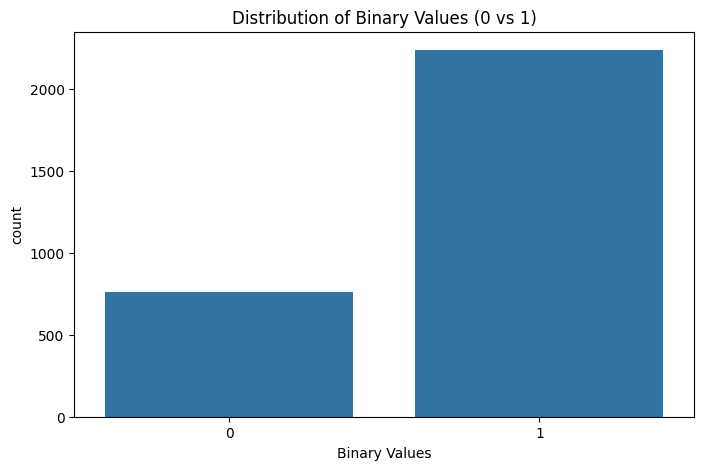


=== Completed All Steps Successfully ===


In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_binary.melt(value_name="Binary Values"), x="Binary Values")
plt.title("Distribution of Binary Values (0 vs 1)")
plt.show()

print("\n=== Completed All Steps Successfully ===")